In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt

In [4]:
mnist = input_data.read_data_sets("/tmp/mnist_data/",one_hot = True)

Extracting /tmp/mnist_data/train-images-idx3-ubyte.gz
Extracting /tmp/mnist_data/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist_data/t10k-labels-idx1-ubyte.gz


In [5]:
nodes_hidden_layer1 = 500
nodes_hidden_layer2 = 500
nodes_hidden_layer3 = 500

learning_rate = 0.001

training_epochs=20
n_input = 784
n_classes = 10
batch_size = 100

X = tf.placeholder('float',[None,784])
Y = tf.placeholder('float',[None,10])

In [6]:
def neural_network_model(x):
    
    weights = {
    'h1': tf.Variable(tf.random_normal([n_input, nodes_hidden_layer1])),
    'h2': tf.Variable(tf.random_normal([nodes_hidden_layer1, nodes_hidden_layer2])),
    'h3': tf.Variable(tf.random_normal([nodes_hidden_layer2, nodes_hidden_layer3])),
    'out': tf.Variable(tf.random_normal([nodes_hidden_layer3, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([nodes_hidden_layer1])),
        'b2': tf.Variable(tf.random_normal([nodes_hidden_layer2])),
        'b3': tf.Variable(tf.random_normal([nodes_hidden_layer3])),
        'out': tf.Variable(tf.random_normal([n_classes]))
    }
    
    l1 = tf.matmul(x,weights['h1']) + biases['b1']
    l1 = tf.nn.leaky_relu(l1)
    
    l2 = tf.matmul(l1,weights['h2']) + biases['b2']
    l2 = tf.nn.leaky_relu(l2)
    
    l3 = tf.matmul(l2,weights['h3']) + biases['b3']
    l3 = tf.nn.leaky_relu(l3)
    
    
    output = tf.matmul(l3,weights['out']) + biases['out']
   
    
    return output

In [7]:
def train_neural_netwrok(X):
    display_step=1
    
    sn = 1000
    amount = 9
    lines = 3
    columns = 3
    image = np.zeros((amount, 28, 28))
    number = np.zeros(amount)
    label=[]
    
    logits = neural_network_model(X)

    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)


    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)


        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            for i in range(total_batch):
                batch_x, batch_y = mnist.train.next_batch(batch_size)

                _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,Y: batch_y})

                avg_cost += c / total_batch

            if epoch % display_step == 0:
                print("Epoch:", (epoch+1), "cost=",(avg_cost))
        print("Optimization Finished!")

        
        pred = tf.nn.softmax(logits)  
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
        
        prediction=tf.argmax(pred,1)
        
       
        for i in range(amount):
            image[i] = mnist.test.images[sn + i].reshape(28, 28)
            number[i] = int(prediction.eval({X: mnist.test.images, Y: mnist.test.labels})[sn+i])
            

        fig = plt.figure()

        for i in range(amount):

            ax = fig.add_subplot(lines, columns, 1 + i)
            plt.imshow(image[i], cmap='binary')

        print(number)
        plt.show()    


Epoch: 1 cost= 3228.6669683005557
Epoch: 2 cost= 833.5908220950053
Epoch: 3 cost= 475.7349719515719
Epoch: 4 cost= 288.63657923947676
Epoch: 5 cost= 193.53078813292746
Epoch: 6 cost= 135.71358606728634
Epoch: 7 cost= 100.56387530856436
Epoch: 8 cost= 74.66745074421178
Epoch: 9 cost= 63.98109910849073
Epoch: 10 cost= 50.484822467109154
Epoch: 11 cost= 55.19446724257052
Epoch: 12 cost= 41.31292935215775
Epoch: 13 cost= 40.167542945715475
Epoch: 14 cost= 34.8715445838733
Epoch: 15 cost= 29.585528033755054
Epoch: 16 cost= 25.15091920209879
Epoch: 17 cost= 33.38462271647019
Epoch: 18 cost= 32.074619821646536
Epoch: 19 cost= 30.365648853608693
Epoch: 20 cost= 24.999858787601664
Optimization Finished!
Accuracy: 0.963
[9. 0. 2. 5. 1. 9. 7. 8. 1.]


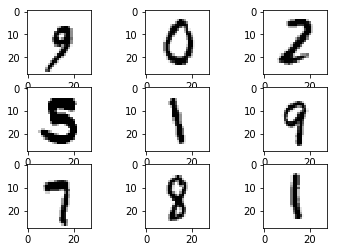

In [8]:
train_neural_netwrok(X)